# Replication 2: Python
Group  : 1

Members:
- Juan José Tang
- Ursula Cotrina 
- Victoria Olivera


# Data Splitting

This method consists in randomly spliting a given sample in two subsamples: train and test. Usually, as a convention, it is set 75% for train and 25% for test. The training sample is used for estimating the parameters of the underlying model, while the testing sample is used to evalute the predictive capacity of the model with out-of-sample data. 

Let's suppose that we have a training sample, and we estimate the following model:

$$Y^{TR} = \beta_1 X_1^{TR}+\beta_2 X_2^{TR} + \epsilon^{TR}$$

Which will yield estimated values for the coefficients: $\widehat{\beta_1}$, $\widehat{\beta_2}$. Now, to evaluate the ability of this particular model to predict out-of-sample observations, we construct the predicted values of the testing sample:

$$\widehat{Y^{TE}} =\widehat{\beta_1} X_1^{TE}+\widehat{\beta_2} X_2^{TE}$$

Then, we could measure the MSE of these predictions:

$$MSE^{TE} = \frac{1}{N^{TE}}\sum_{i=1}^{N^{TE}} \left(Y^{TE}-\widehat{Y^{TE}}\right)^2$$

## K-fold Cross Validation

It's an algorithm to estimate prediction errors.

Consider a sample that is partitioned in K blocks, or folds (generally, K = 5,10). The idea is to make recursive estimations of a given model, with varying training and testing samples. The k-fold cross validation method relies on the following steps:

Consider a number of values for the tuning parameter $\lambda_j = {\lambda_1,...,\lambda_m}$

Consider a number of folds $k = {1,...,K}$

1. For each $\lambda_j = {\lambda_1,...,\lambda_m}$

   1.1 For each $k = {1,...,K}$:
     
          1.1.1 Estimate the model using every fold BUT i-fold.

          1.1.2 With the coefficients estimated in (1.1.1), make an out-of-sample prediction of i-fold, calculate the estimation error and store it.
    
          1.1.3 Return to (1.1), and iterate over all others k = {1,...,K}.

   1.2 Return to (1) and iterate over all others  $\lambda_j = {\lambda_1,...,\lambda_m}$


This process will yield a set of estimation errors: for every observation inside an i-fold, for every fold, and for every $\lambda_j$. Over a particular $\lambda_j$, consider that the average error of all folds is given by:

$$Average Error (\lambda) = \frac{1}{N}\sum_{k=1}^K \sum_{i \in F_k} \left(y_i-\widehat{y_{\lambda}^{-k}}\right)^2$$

Where $\widehat{y_{\lambda}^{-k}}$ is the prediction of a particular observation in fold "k", made with coefficients from a regression over all other folds.

The optimal $\lambda$, from all posible $\lambda_j = {\lambda_1,...,\lambda_m}$ is be the one that minimizes the Average Error, that is:

$$\hat\lambda = \underset{\lambda \in {\lambda_1,...,\lambda_m}} {argmin} Average Error (\lambda)$$

We used K-cross Validation to estimate an optimal lambda in a context of a Lasso regression

# Data analysis

In [98]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadr
import hdmpy
import seaborn as sns

In [99]:
rdata_read = pyreadr.read_r("../../data/wage2015_subsample_inference.RData")
data = rdata_read[ 'data' ]
type(data)
data.shape

(5150, 20)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5150 entries, 10 to 32643
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   wage    5150 non-null   float64 
 1   lwage   5150 non-null   float64 
 2   sex     5150 non-null   float64 
 3   shs     5150 non-null   float64 
 4   hsg     5150 non-null   float64 
 5   scl     5150 non-null   float64 
 6   clg     5150 non-null   float64 
 7   ad      5150 non-null   float64 
 8   mw      5150 non-null   float64 
 9   so      5150 non-null   float64 
 10  we      5150 non-null   float64 
 11  ne      5150 non-null   float64 
 12  exp1    5150 non-null   float64 
 13  exp2    5150 non-null   float64 
 14  exp3    5150 non-null   float64 
 15  exp4    5150 non-null   float64 
 16  occ     5150 non-null   category
 17  occ2    5150 non-null   category
 18  ind     5150 non-null   category
 19  ind2    5150 non-null   category
dtypes: category(4), float64(16)
memory usage: 736.3+ KB


In [101]:
data=data[(data['shs']==1)|(data['hsg']==1)]
data.shape

(1376, 20)

#### Lwage

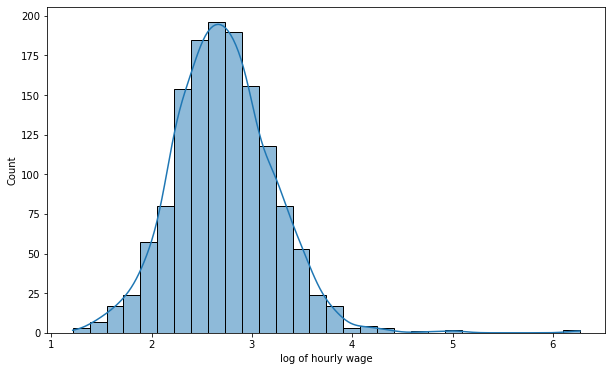

In [102]:
fig, ax = plt.subplots(figsize=(10,6))

hist = sns.histplot(data=data, x="lwage", bins=30, kde=True)
plt.xlabel('log of hourly wage')
plt.show()

#sns.histplot(data=data, x="lwage", kde=True)

#### Some high school

In [103]:
base = data.groupby([ 'sex' ]).sum()
base

,wage,lwage,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4
sex,,,,,,,,,,,,,,,
0.0,17488.184460,2572.443840,91.0,842.0,0.0,0.0,0.0,267.0,268.0,187.0,211.0,15910.0,3711.1050,10513.075750,33239.028337
1.0,7079.406981,1168.298055,29.0,414.0,0.0,0.0,0.0,127.0,133.0,86.0,97.0,7743.5,1833.5275,5220.639125,16514.793344


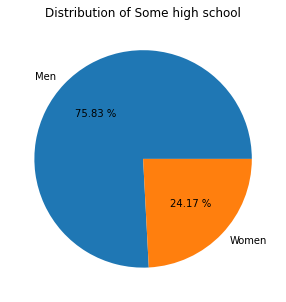

In [104]:
labels=['Men','Women']

plt.figure(figsize=(5,5))

ax = plt.pie(base['shs'],labels=labels, autopct='%.2f %%')
plt.title('Distribution of Some high school')
plt.show()

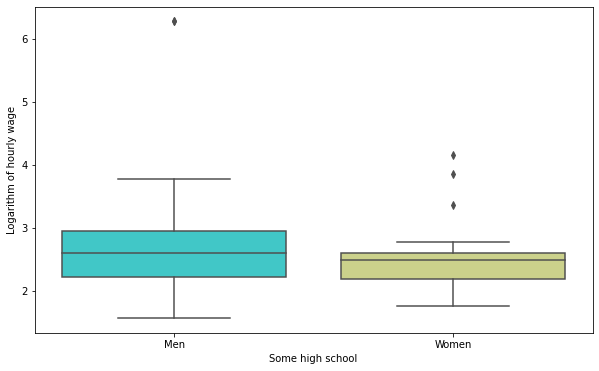

In [105]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="sex", y="lwage", data=data[data['shs']==1],palette='rainbow')
plt.xlabel('Some high school')
plt.ylabel('Logarithm of hourly wage')
(box.set_xticklabels(["Men", "Women"]))
plt.show()

#### High school graduated

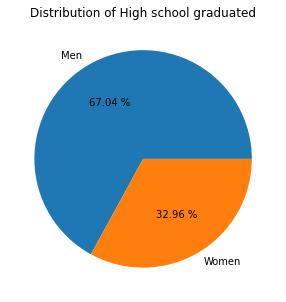

In [106]:
labels=['Men','Women']

plt.figure(figsize=(5,5))

ax = plt.pie(base['hsg'],labels=labels, autopct='%.2f %%')
plt.title('Distribution of High school graduated')
plt.show()

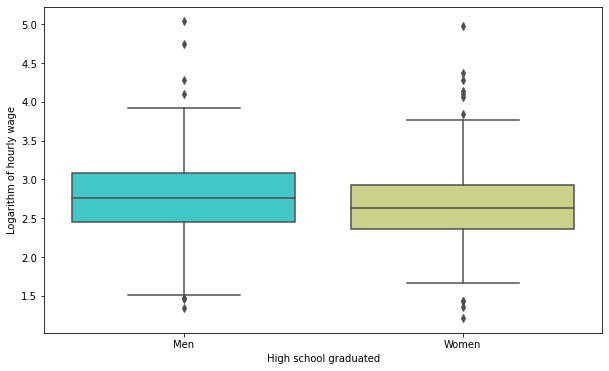

In [107]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="sex", y="lwage", data=data[data['hsg']==1] ,palette='rainbow')
plt.xlabel('High school graduated')
plt.ylabel('Logarithm of hourly wage')
(box.set_xticklabels(["Men", "Women"]))
plt.show()

### Experience

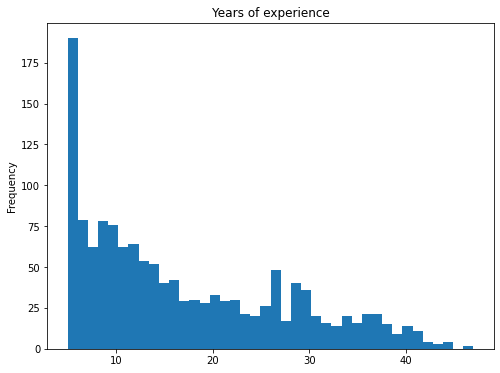

In [108]:
data['exp1'].plot(kind = 'hist', bins = 40, figsize = (8,6))
plt.title('Years of experience')
plt.show()

## Prediction Question

In [109]:
# Import packages for OLS regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [110]:
# 1. basic model
basic = 'lwage ~ sex + exp1 + shs + hsg + mw + so + we + occ2+ ind2'
basic_results = smf.ols(basic , data=data).fit()
print(basic_results.summary()) # estimated coefficients
print( "Number of regressors in the basic model:",len(basic_results.params), '\n')  # number of regressors in the Basic Model

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     6.212
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           9.07e-33
Time:                        16:33:17   Log-Likelihood:                -872.87
No. Observations:                1376   AIC:                             1842.
Df Residuals:                    1328   BIC:                             2093.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0216      0.062     32.368      0.0

In [111]:
err_series1 = basic_results.params - basic_results.conf_int()[0]
coef_df1 = pd.DataFrame({'coef': basic_results.params.at['sex'],
                        'err': err_series1.at['sex'],
                        'std. error': basic_results.summary2().tables[1]['Std.Err.']['sex'],
                        'varname': ['Basic model']
                       })
coef_df1

,coef,err,std. error,varname
0,-0.073309,0.061684,0.031443,Basic model


In [112]:
# 2. flexible model
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)**2'
flex_results_0 = smf.ols(flex , data=data)
flex_results = smf.ols(flex , data=data).fit()
print(flex_results.summary()) # estimated coefficients
print( "Number of regressors in the basic model:",len(flex_results.params), '\n') # number of regressors in the Flexible Model

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     1.856
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           8.92e-16
Time:                        16:33:17   Log-Likelihood:                -518.83
No. Observations:                1376   AIC:                             2028.
Df Residuals:                     881   BIC:                             4615.
Df Model:                         494                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.55

In [113]:
err_series2 = flex_results.params - flex_results.conf_int()[0]
coef_df2 = pd.DataFrame({'coef': flex_results.params.at['sex'],
                        'err': err_series2.at['sex'],
                        'std. error': flex_results.summary2().tables[1]['Std.Err.']['sex'],
                        'varname': ['Flexible model']
                       })
coef_df2

,coef,err,std. error,varname
0,-0.088329,0.075222,0.038327,Flexible model


In [114]:
concat = pd.concat([coef_df1,coef_df2])
concat

,coef,err,std. error,varname
0,-0.073309,0.061684,0.031443,Basic model
0,-0.088329,0.075222,0.038327,Flexible model


C:\Users\Pelusa\AppData\Local\Temp/ipykernel_15048/2996988909.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(concat.shape[0]),


Text(0.5, 1.0, 'Interval confidence of sex coefficient')

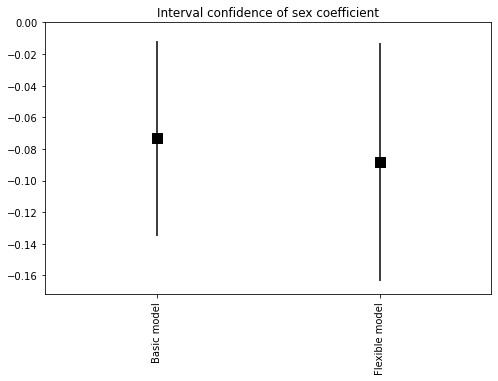

In [115]:
fig, ax = plt.subplots(figsize=(8, 5))
concat.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(concat.shape[0]), 
        marker='s', s=120, 
        y=concat['coef'], color='black')
plt.title('Interval confidence of sex coefficient')
#ax.axhline(y=0, linestyle='--', color='black', linewidth=4)

## Partialling-Out using Lasso

In [116]:
# Import relevant packages for lasso 
from sklearn.linear_model import LassoCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error  #MSE

In [117]:
# Create main variables
Y = data['lwage']
W = data[['exp1', 'shs','hsg', 'mw', 'so', 'we', 'occ2', 'ind2']]
D = data['sex']

## Case 1: Partialling-Out using lasso 1

In [118]:
# Aquí no estoy incluyendo lambda. Internamente elige un lambda óptimo. Para cada lambda hay un cross validation
# Se elige asociado al MSE mínimo
# Estos son los residuos (estimados?)
res_Y = hdmpy.rlasso( W, Y, post=True ).est['residuals'] # función rlasso.post=True sí es post lasso
#El post lasso es un simple OLS
res_D = hdmpy.rlasso( W, D, post=True ).est['residuals'] # Estoy limpiando el efecto de W

r_Y = pd.DataFrame(res_Y, columns=['r_Y'])
r_D = pd.DataFrame(res_D, columns=['r_D'])

In [119]:
#data['occ2'].nunique()

In [120]:
#data['ind2'].nunique()

In [121]:
# OLS regression
reg_ols  = sm.OLS(r_Y, r_D).fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                    r_Y   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):              0.009
Method:                 Least Squares   F-statistic:                              13.54
Date:                Sat, 16 Apr 2022   Prob (F-statistic):                    0.000243
Time:                        16:33:18   Log-Likelihood:                         -967.64
No. Observations:                1376   AIC:                                      1937.
Df Residuals:                    1375   BIC:                                      1943.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [122]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso = reg_ols.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso = reg_ols.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso = reg_ols.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = reg_ols.summary2().tables[1]['0.975]']['r_D']
errseries=(upper_ci_lasso-lower_ci_lasso)/2

In [123]:
coef_df = pd.DataFrame({'coef': [est_lasso], # desde la fila 1 en adelante
                        'err': [errseries],
                        'std. error': reg_ols.summary2().tables[1]['Std.Err.']['r_D'],
                        'varname': ['Basic Lasso']
                       })
coef_df

,coef,err,std. error,varname
0,-0.110144,0.058723,0.029935,Basic Lasso


## Case 2: Partialling-Out using lasso 2

In [124]:
W_1_ = data[['exp1','exp2','exp3','exp4','shs','hsg','mw','so','we']]

#Convert the variable categorics to dummies
df1 = pd.get_dummies(data = data['occ2'],prefix='occ2')
df2 = pd.get_dummies(data = data['ind2'],prefix='ind2')

In [125]:
W_1_

,exp1,exp2,exp3,exp4,shs,hsg,mw,so,we
rownames,,,,,,,,,
15,18.0,3.24,5.832,10.4976,0.0,1.0,0.0,0.0,0.0
43,42.0,17.64,74.088,311.1696,0.0,1.0,0.0,0.0,0.0
44,37.0,13.69,50.653,187.4161,0.0,1.0,0.0,0.0,0.0
47,31.0,9.61,29.791,92.3521,0.0,1.0,0.0,0.0,0.0
73,7.0,0.49,0.343,0.2401,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32580,15.0,2.25,3.375,5.0625,0.0,1.0,0.0,0.0,1.0
32590,8.0,0.64,0.512,0.4096,0.0,1.0,0.0,0.0,1.0
32599,15.0,2.25,3.375,5.0625,0.0,1.0,0.0,0.0,1.0


In [126]:
from itertools import chain, combinations
def all_subsets(ss):
    return chain(*map(lambda x: combinations(ss, x), range(1, len(ss)+1)))

tups = list(all_subsets(W_1_.columns))
tups = tups[:45]
tups

[('exp1',),
 ('exp2',),
 ('exp3',),
 ('exp4',),
 ('shs',),
 ('hsg',),
 ('mw',),
 ('so',),
 ('we',),
 ('exp1', 'exp2'),
 ('exp1', 'exp3'),
 ('exp1', 'exp4'),
 ('exp1', 'shs'),
 ('exp1', 'hsg'),
 ('exp1', 'mw'),
 ('exp1', 'so'),
 ('exp1', 'we'),
 ('exp2', 'exp3'),
 ('exp2', 'exp4'),
 ('exp2', 'shs'),
 ('exp2', 'hsg'),
 ('exp2', 'mw'),
 ('exp2', 'so'),
 ('exp2', 'we'),
 ('exp3', 'exp4'),
 ('exp3', 'shs'),
 ('exp3', 'hsg'),
 ('exp3', 'mw'),
 ('exp3', 'so'),
 ('exp3', 'we'),
 ('exp4', 'shs'),
 ('exp4', 'hsg'),
 ('exp4', 'mw'),
 ('exp4', 'so'),
 ('exp4', 'we'),
 ('shs', 'hsg'),
 ('shs', 'mw'),
 ('shs', 'so'),
 ('shs', 'we'),
 ('hsg', 'mw'),
 ('hsg', 'so'),
 ('hsg', 'we'),
 ('mw', 'so'),
 ('mw', 'we'),
 ('so', 'we')]

In [127]:
df3 = pd.concat([W_1_.loc[:,c].product(axis=1) for c in tups], axis=1)

df3.columns = [''.join(x) for x in tups]
print (df3)

          exp1   exp2    exp3      exp4  shs  hsg   mw   so   we  exp1exp2  \
rownames                                                                     
15        18.0   3.24   5.832   10.4976  0.0  1.0  0.0  0.0  0.0     58.32   
43        42.0  17.64  74.088  311.1696  0.0  1.0  0.0  0.0  0.0    740.88   
44        37.0  13.69  50.653  187.4161  0.0  1.0  0.0  0.0  0.0    506.53   
47        31.0   9.61  29.791   92.3521  0.0  1.0  0.0  0.0  0.0    297.91   
73         7.0   0.49   0.343    0.2401  0.0  1.0  0.0  0.0  0.0      3.43   
...        ...    ...     ...       ...  ...  ...  ...  ...  ...       ...   
32580     15.0   2.25   3.375    5.0625  0.0  1.0  0.0  0.0  1.0     33.75   
32590      8.0   0.64   0.512    0.4096  0.0  1.0  0.0  0.0  1.0      5.12   
32599     15.0   2.25   3.375    5.0625  0.0  1.0  0.0  0.0  1.0     33.75   
32603     11.0   1.21   1.331    1.4641  0.0  1.0  0.0  0.0  1.0     13.31   
32631     10.0   1.00   1.000    1.0000  0.0  1.0  0.0  0.0  1.0

In [128]:
#W_1 = pd.concat([df1,df2,df3],axis = 1)
#W_1

In [129]:
dfx = pd.DataFrame()
#iteration of variables occ2 and ind2
for j in range(df2.shape[1]):
    for i in range(df1.shape[1]):
        dfx[df1.columns[i]+':'+df2.columns[j]]=df1[df1.columns[i]]*df2[df2.columns[j]]

#iteration of variables exp1, exp2, exp3 , exp4 and occ2      
for j in range(4):
    for i in range(df1.shape[1]):
        dfx[W_1_.columns[j]+':'+df1.columns[i]]=W_1_[W_1_.columns[j]]*df1[df1.columns[i]] 

#iteration of variables exp1, exp2, exp3 , exp4 and ind2        
for j in range(4):
    for i in range(df2.shape[1]):
        dfx[W_1_.columns[j]+':'+df2.columns[i]]=W_1_[W_1_.columns[j]]*df2[df2.columns[i]] 

C:\Users\Pelusa\AppData\Local\Temp/ipykernel_15048/636901998.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfx[df1.columns[i]+':'+df2.columns[j]]=df1[df1.columns[i]]*df2[df2.columns[j]]
C:\Users\Pelusa\AppData\Local\Temp/ipykernel_15048/636901998.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dfx[W_1_.columns[j]+':'+df1.columns[i]]=W_1_[W_1_.columns[j]]*df1[df1.columns[i]]
C:\Users\Pelusa\AppData\Local\Temp/ipykernel_15048/636901998.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

In [130]:
W_1 = pd.concat([df1,df2,df3,dfx],axis = 1)
W_1

,occ2_1,occ2_10,occ2_11,occ2_12,occ2_13,occ2_14,occ2_15,occ2_16,occ2_17,occ2_18,...,exp4:ind2_20,exp4:ind2_21,exp4:ind2_22,exp4:ind2_3,exp4:ind2_4,exp4:ind2_5,exp4:ind2_6,exp4:ind2_7,exp4:ind2_8,exp4:ind2_9
rownames,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0000,0.0000,0.0,10.4976,0.0,0.0,0.0,0.0,0.0000
43,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000
44,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,187.4161
47,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000
73,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32580,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0000,5.0625,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000
32590,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000
32599,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,5.0625


In [131]:
# Aquí no estoy incluyendo lambda. Internamente elige un lambda óptimo. Para cada lambda hay un cross validation
# Se elige asociado al MSE mínimo
# Estos son los residuos (estimados?)
res_Y = hdmpy.rlasso( W_1, Y, post=True ).est['residuals'] # función rlasso.post=True sí es post lasso
#El post lasso es un simple OLS
res_D = hdmpy.rlasso( W_1, D, post=True ).est['residuals'] # Estoy limpiando el efecto de W

r_Y = pd.DataFrame(res_Y, columns=['r_Y'])
r_D = pd.DataFrame(res_D, columns=['r_D'])

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]

In [132]:
# OLS regression
reg_ols  = sm.OLS(r_Y, r_D).fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                    r_Y   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              6.919
Date:                Sat, 16 Apr 2022   Prob (F-statistic):                     0.00862
Time:                        16:33:21   Log-Likelihood:                         -937.99
No. Observations:                1376   AIC:                                      1878.
Df Residuals:                    1375   BIC:                                      1883.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [133]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso = reg_ols.summary2().tables[1]['Coef.']['r_D']

# output: std. error
std_lasso = reg_ols.summary2().tables[1]['Std.Err.']['r_D']

# output: 95% confidence interval
lower_ci_lasso = reg_ols.summary2().tables[1]['[0.025']['r_D']
upper_ci_lasso = reg_ols.summary2().tables[1]['0.975]']['r_D']
errseries1=(upper_ci_lasso-lower_ci_lasso)/2

In [134]:
errseries1=(upper_ci_lasso-lower_ci_lasso)/2
errseries1

0.06193130627795401

In [135]:
coef_df1 = pd.DataFrame({'coef': [est_lasso], # desde la fila 1 en adelante
                        'err': [errseries1],
                        'std. error': reg_ols.summary2().tables[1]['Std.Err.']['r_D'],
                        'varname': ['Flexible Lasso']
                       })
coef_df1

,coef,err,std. error,varname
0,-0.083045,0.061931,0.03157,Flexible Lasso


In [136]:
concat = pd.concat([concat,coef_df,coef_df1])
concat

,coef,err,std. error,varname
0,-0.073309,0.061684,0.031443,Basic model
0,-0.088329,0.075222,0.038327,Flexible model
0,-0.110144,0.058723,0.029935,Basic Lasso
0,-0.083045,0.061931,0.031570,Flexible Lasso


C:\Users\Pelusa\AppData\Local\Temp/ipykernel_15048/2996988909.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(concat.shape[0]),


Text(0.5, 1.0, 'Interval confidence of sex coefficient')

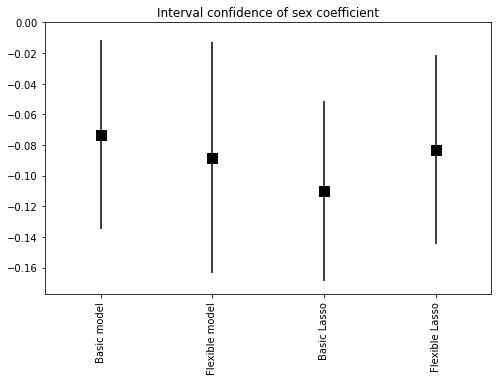

In [137]:
fig, ax = plt.subplots(figsize=(8, 5))
concat.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(concat.shape[0]), 
        marker='s', s=120, 
        y=concat['coef'], color='black')
plt.title('Interval confidence of sex coefficient')
#ax.axhline(y=0, linestyle='--', color='black', linewidth=4)

### Comments

This sample has 1376 observations. For the basic model, we have 49 regressors. In the case of the flexible model, there are more than 700 regressors. Partialling-out works well when the dimension of W is small compared to the sample size. Because the number of regressors is high, we use lasso-penalization. As we can see, the standard error when we use lasso penalization is minor. This is because there are irrelevant regressors. Another observation is that flexible model has a higher standard error than the basic model.